In [192]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import requests
from textwrap import wrap

def units(x, pos):
    if x >= 1000:
        return f'${x/1000:1.1f}K'
    else:
        return f'${x:1.1f}'

In [210]:
energy = [  "https://www.indexmundi.com/commodities/?commodity=diesel&months=24",
            "https://www.indexmundi.com/commodities/?commodity=crude-oil&months=24",
            "https://www.indexmundi.com/commodities/?commodity=gasoline&months=24",
            "https://www.indexmundi.com/commodities/?commodity=natural-gas&months=24"]

dfs = []

for i in energy:
    for num in range(len(pd.read_html(i))):
        response = requests.get(i)
        energy_response = response.text
        soup = BeautifulSoup(energy_response, "html.parser")
        desc = soup.find(id="lblSeriesDescription").get_text()
        
        df = pd.read_html(i)[num]
        df["Index"] = i.split("commodity=")[1].split("&")[0].title()
        df["Description"] = desc
        dfs.append(df)    

df = pd.concat(dfs).loc[:,["Index", "Month", "Price", "Description"]]

In [211]:
df = (df
 .dropna()
 .assign(Month=lambda df_: pd.to_datetime(df_["Month"], format="%b %Y"),
         Full_Desc=lambda df_: df_["Index"] + ":\n" + df_["Description"])
)

Text(0, -0.02, 'Data source: Index Mundi - https://www.indexmundi.com/commodities/')

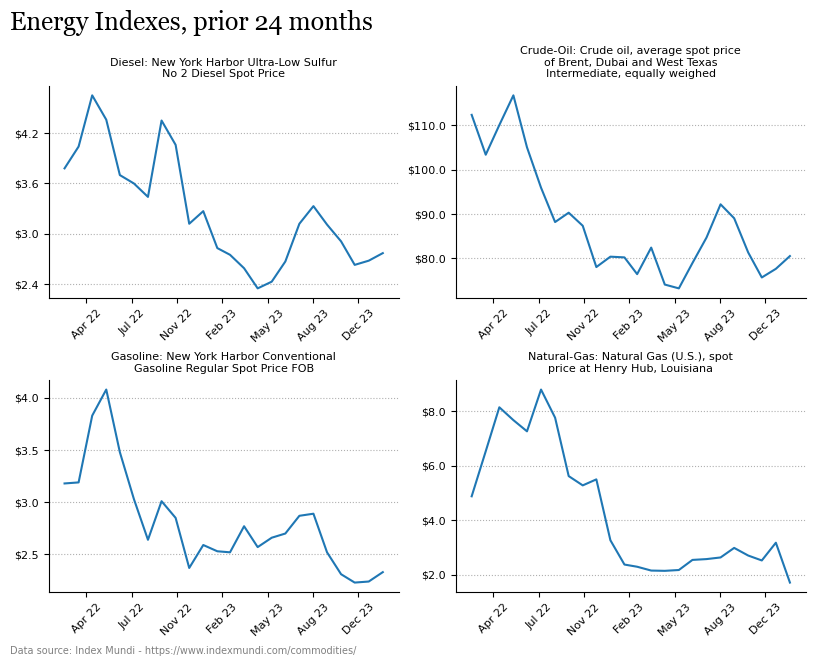

In [212]:
def units(x, pos):
    if x >= 1000:
        return f'${x/1000:1.1f}K'
    else:
        return f'${x:1.1f}'

indexes = df["Full_Desc"].drop_duplicates().to_list()

axd = plt.figure(layout="constrained", figsize=(8,6)).subplot_mosaic(
    """
    AB
    CD
    """
)

plots = ["A", "B", "C", "D"]

for index, plot in zip(indexes, plots):
    data = df.query("Full_Desc == @index")
    line = axd[plot].plot(data["Month"], data["Price"])
    axd[plot].set_title('\n'.join(wrap(index, 40)), fontdict={"fontsize": 8})
    
    axd[plot].yaxis.set_major_locator(plt.MaxNLocator(5))
    axd[plot].yaxis.set_major_formatter(units)

    axd[plot].xaxis.set_major_locator(plt.MaxNLocator(8))
    axd[plot].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    
    axd[plot].tick_params(axis="x", labelrotation=45)
    axd[plot].tick_params(axis="both", labelsize=8)
    axd[plot].spines["top"].set_visible(False)
    axd[plot].spines["right"].set_visible(False)
    axd[plot].grid(axis="y", linestyle="dotted")
    
plt.figtext(0, 1.02, 
            "Energy Indexes, prior 24 months", 
            fontsize=18, ha="left",
            fontdict={'fontname': 'Georgia'})

plt.figtext(0, -0.02, 
            "Data source: Index Mundi - https://www.indexmundi.com/commodities/",
            fontsize=7, ha='left', 
            fontdict={"color": "grey"})

In [213]:
veg_oils = ["https://www.indexmundi.com/commodities/?commodity=coconut-oil&months=24",
            "https://www.indexmundi.com/commodities/?commodity=palm-oil&months=24",
            "https://www.indexmundi.com/commodities/?commodity=rapeseed-oil&months=24",
            "https://www.indexmundi.com/commodities/?commodity=soybean-oil&months=24"]

dfs = []

for i in veg_oils:
    for num in range(len(pd.read_html(i))):
        response = requests.get(i)
        text_response = response.text
        soup = BeautifulSoup(text_response, "html.parser")
        desc = soup.find(id="lblSeriesDescription").get_text()
        
        df = pd.read_html(i)[num]
        df["Index"] = i.split("commodity=")[1].split("&")[0].title()
        df["Description"] = desc
        dfs.append(df)    

df = pd.concat(dfs).loc[:,["Index", "Month", "Price", "Description"]]

In [214]:
df = (df
 .dropna()
 .assign(Month=lambda df_: pd.to_datetime(df_["Month"], format="%b %Y"),
         Full_Desc=lambda df_: df_["Index"] + ":\n" + df_["Description"])
)

Text(0, -0.02, 'Source: Index Mundi - https://www.indexmundi.com/commodities/')

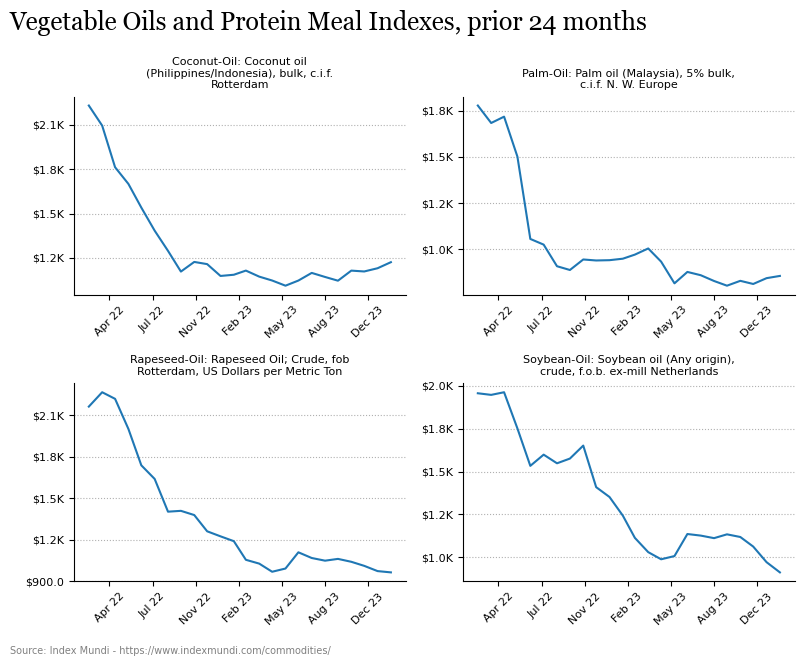

In [215]:
indexes = df["Full_Desc"].drop_duplicates().to_list()

axd = plt.figure(layout="constrained", figsize=(8,6)).subplot_mosaic(
    """
    AB
    CD
    """
)

plots = ["A", "B", "C", "D"]

for index, plot in zip(indexes, plots):
    data = df.query("Full_Desc == @index")
    line = axd[plot].plot(data["Month"], data["Price"])
    axd[plot].set_title('\n'.join(wrap(index, 40)), fontdict={"fontsize": 8})
    
    axd[plot].yaxis.set_major_locator(plt.MaxNLocator(5))
    axd[plot].yaxis.set_major_formatter(units)

    axd[plot].xaxis.set_major_locator(plt.MaxNLocator(8))
    axd[plot].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    
    axd[plot].tick_params(axis="x", labelrotation=45)
    axd[plot].tick_params(axis="both", labelsize=8)
    axd[plot].spines["top"].set_visible(False)
    axd[plot].spines["right"].set_visible(False)
    axd[plot].grid(axis="y", linestyle="dotted")
    
plt.figtext(0, 1.02, 
            "Vegetable Oils and Protein Meal Indexes, prior 24 months", 
            fontsize=18, ha="left",
            fontdict={'fontname': 'Georgia'})

plt.figtext(0, -0.02, 
            "Source: Index Mundi - https://www.indexmundi.com/commodities/",
            fontsize=7, ha='left', 
            fontdict={"color": "grey"})

In [216]:
raw_agg = ["https://www.indexmundi.com/commodities/?commodity=plywood&months=24",
           "https://www.indexmundi.com/commodities/?commodity=soft-logs&months=24"]

dfs = []

for i in raw_agg:
    for num in range(len(pd.read_html(i))):
        response = requests.get(i)
        text_response = response.text
        soup = BeautifulSoup(text_response, "html.parser")
        desc = soup.find(id="lblSeriesDescription").get_text()
        
        df = pd.read_html(i)[num]
        df["Index"] = i.split("commodity=")[1].split("&")[0].title()
        df["Description"] = desc
        dfs.append(df)    

df = pd.concat(dfs).loc[:,["Index", "Month", "Price", "Description"]]

df = (df
 .dropna()
 .assign(Month=lambda df_: pd.to_datetime(df_["Month"], format="%b %Y"),
         Full_Desc=lambda df_: df_["Index"] + ":\n" + df_["Description"])
)

Text(0, -0.05, 'Data source: Index Mundi - https://www.indexmundi.com/commodities/')

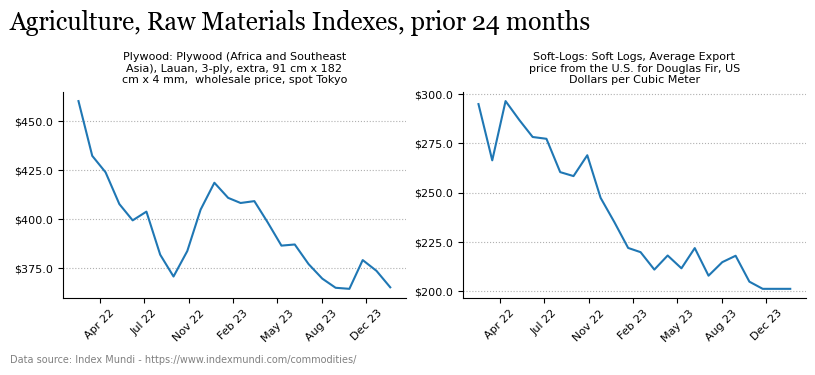

In [217]:
def units(x, pos):
    if x >= 1000:
        return f'${x/1000:1.1f}K'
    else:
        return f'${x:1.1f}'

indexes = df["Full_Desc"].drop_duplicates().to_list()

axd = plt.figure(layout="constrained", figsize=(8,3)).subplot_mosaic(
    """
    AB
    """
)

plots = ["A", "B"]

for index, plot in zip(indexes, plots):
    data = df.query("Full_Desc == @index")
    line = axd[plot].plot(data["Month"], data["Price"])
    axd[plot].set_title('\n'.join(wrap(index, 40)), fontdict={"fontsize": 8})
    
    axd[plot].yaxis.set_major_locator(plt.MaxNLocator(5))
    axd[plot].yaxis.set_major_formatter(units)

    axd[plot].xaxis.set_major_locator(plt.MaxNLocator(8))
    axd[plot].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    
    axd[plot].tick_params(axis="x", labelrotation=45)
    axd[plot].tick_params(axis="both", labelsize=8)
    axd[plot].spines["top"].set_visible(False)
    axd[plot].spines["right"].set_visible(False)
    axd[plot].grid(axis="y", linestyle="dotted")
    
plt.figtext(0, 1.06, 
            "Agriculture, Raw Materials Indexes, prior 24 months", 
            fontsize=18, ha="left",
            fontdict={'fontname': 'Georgia'})

plt.figtext(0, -0.05, 
            "Data source: Index Mundi - https://www.indexmundi.com/commodities/",
            fontsize=7, ha='left', 
            fontdict={"color": "grey"})